In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
sz=81*81
sz_sqrt = np.sqrt(sz).astype('int32')
num_patterns=5
NO_OF_BITS_TO_CHANGE=int(sz/2)

In [2]:
def convert_to_numpy_original(image):
    image_arr=[]
    size=(81,81)
    image=image.resize(size)
    image_arr.append(np.array(image))
#    image_arr=np.array(image_arr)
    return image_arr

In [3]:
def convert_to_numpy_grayscale(image):
    image_arr=[]
    size=(81,81)
    image=image.resize(size)
    image.thumbnail(size,Image.ANTIALIAS)
    image_arr.append(np.array(image))
    image_arr=np.array(image_arr)
    rgb_weights = [0.2989, 0.5870, 0.1140]
    images_2d =np.array([np.dot(img[...,:3], rgb_weights) for img in image_arr])
    im_np=np.where(images_2d<128,-1,1)
    return im_np

In [4]:
image_lst=['smiling.jpg','sunglasses.jpg','annoyed.jpg','wow.jpg','surprised.jpg']
original=[]
for img in image_lst:
    im=Image.open(img)
    im=convert_to_numpy_original(im)
    original.append(im)
original=np.array(original)

# ORIGINAL IMAGES

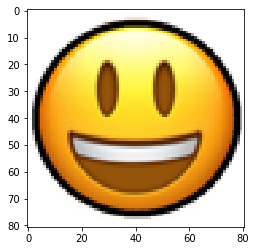

In [5]:
plt.imshow(original[0][0])

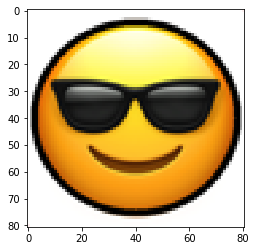

In [6]:
plt.imshow(original[1][0])

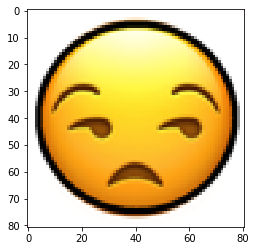

In [7]:
plt.imshow(original[2][0])

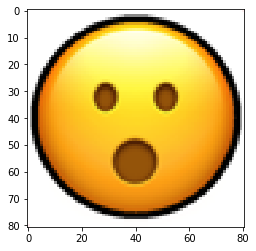

In [8]:
plt.imshow(original[3][0])

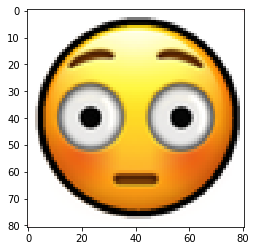

In [9]:
plt.imshow(original[4][0])

In [10]:
image_lst=['smiling.jpg','sunglasses.jpg','annoyed.jpg','wow.jpg','surprised.jpg']
epsilon=[]
for img in image_lst:
    im=Image.open(img)
    im=convert_to_numpy_grayscale(im)
    epsilon.append(im)
epsilon=np.array(epsilon).reshape(5,81,81)

# Transformed Input Images

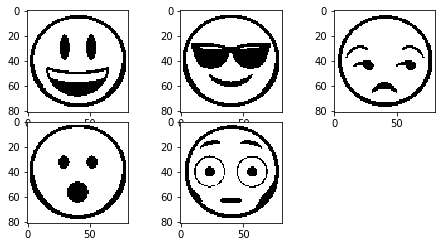

In [11]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(epsilon):
    plt.subplot(4, 3,num+1)
    plt.imshow(np.where(i.reshape(sz_sqrt, sz_sqrt)<1, 0, 1), cmap='gray')

In [12]:
def get_test_image(epsilon):
    test_pattern_index=np.random.randint(num_patterns)
    test_pattern=epsilon[test_pattern_index].reshape(sz)
    random_pattern_test = np.random.choice([1, -1], size=int(NO_OF_BITS_TO_CHANGE))
    test_pattern[int(NO_OF_BITS_TO_CHANGE):]=random_pattern_test
    return test_pattern

# Load Testing Images

In [13]:
tstimglst=[]
test_img1=Image.open('sunglassesmasked.jpg')
test_img1=convert_to_numpy_grayscale(test_img1)
tstimglst.append(test_img1)
test_img2=Image.open('wowmasked.jpg')
test_img2=convert_to_numpy_grayscale(test_img2)
tstimglst.append(test_img2)
test_img3=Image.open('annoyedmasked.jpg')
test_img3=convert_to_numpy_grayscale(test_img3)
tstimglst.append(test_img3)
test_img4=Image.open('smilingmasked.jpg')
test_img4=convert_to_numpy_grayscale(test_img4)
tstimglst.append(test_img4)
test_img5=Image.open('surprisedmasked.jpg')
test_img5=convert_to_numpy_grayscale(test_img5)
tstimglst.append(test_img5)

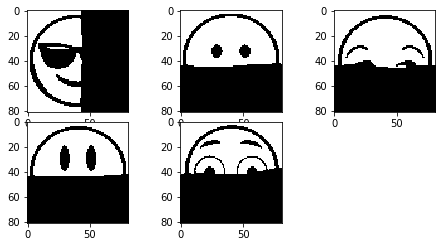

In [14]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(tstimglst):
    plt.subplot(4, 3,num+1)
    plt.imshow(i.reshape(81,81), cmap='gray')

In [15]:
epsilon2=epsilon.reshape(5,sz)

In [16]:
def hebbian_train_hopfield(epsilon2,num_patterns):
    W=np.zeros((sz,sz))
    h=np.zeros((sz))
    for i in tqdm(range(sz)):
        for j in range(sz):
            for p_idx in range(num_patterns):
                W[i,j]=W[i,j]+(epsilon2[p_idx,i]*epsilon2[p_idx,j]).sum()

            if(i==j):
                W[i,j]=0
    W=W/sz
    return W

In [17]:
trained_weights=hebbian_train_hopfield(epsilon2,num_patterns)

100%|███████████████████████████████████████████████████| 6561/6561 [21:24<00:00,  5.11it/s]


In [18]:
trained_weights

array([[0.        , 0.00076208, 0.00076208, ..., 0.00076208, 0.00076208,
        0.00076208],
       [0.00076208, 0.        , 0.00076208, ..., 0.00076208, 0.00076208,
        0.00076208],
       [0.00076208, 0.00076208, 0.        , ..., 0.00076208, 0.00076208,
        0.00076208],
       ...,
       [0.00076208, 0.00076208, 0.00076208, ..., 0.        , 0.00076208,
        0.00076208],
       [0.00076208, 0.00076208, 0.00076208, ..., 0.00076208, 0.        ,
        0.00076208],
       [0.00076208, 0.00076208, 0.00076208, ..., 0.00076208, 0.00076208,
        0.        ]])

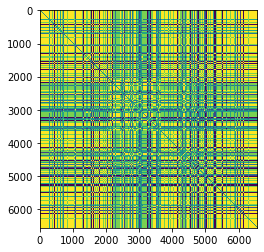

In [19]:
plt.imshow(trained_weights)

In [20]:
def generate_test_images(test_img,W,num_iterations=10):
    fig = plt.figure(figsize = (8, 8))
    #hamming_distance = np.zeros((30, num_patterns))
    h=np.zeros((sz))
    for iteration in tqdm(range(num_iterations)):
        for i in range(sz):
            i = np.random.randint(sz)
            h[i] = 0
            for j in range(sz):
                h[i] += W[i, j]*test_img[j]
        new_test_img = np.where(h<0, -1, 1)
        plt.subplot(6, 5,iteration+1)
        plt.imshow(np.where(new_test_img.reshape(sz_sqrt,sz_sqrt)<1, 0, 1), cmap='gray')

In [21]:
test_img0=tstimglst[0].reshape(sz)
test_img1=tstimglst[1].reshape(sz)
test_img2=tstimglst[2].reshape(sz)
test_img3=tstimglst[3].reshape(sz)
test_img4=tstimglst[4].reshape(sz)

# Test Image 1

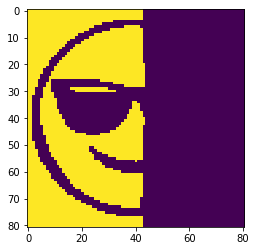

In [22]:
plt.imshow(test_img0.reshape(81,81))

100%|███████████████████████████████████████████████████████| 10/10 [09:43<00:00, 58.30s/it]


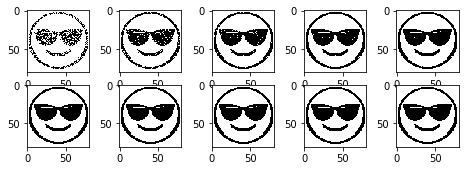

In [23]:
generate_test_images(test_img0,trained_weights)

# Test Image 2

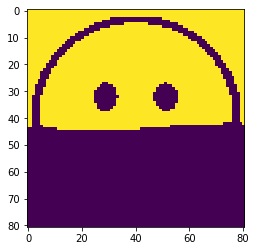

In [24]:
plt.imshow(test_img1.reshape(81,81))

100%|███████████████████████████████████████████████████████| 10/10 [08:37<00:00, 51.73s/it]


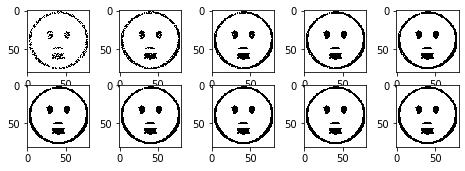

In [25]:
generate_test_images(test_img1,trained_weights)

# Test Image 3

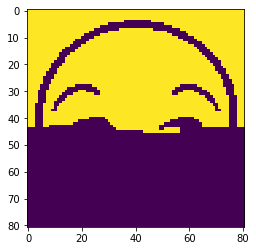

In [26]:
plt.imshow(test_img2.reshape(81,81))

100%|███████████████████████████████████████████████████████| 10/10 [08:45<00:00, 52.58s/it]


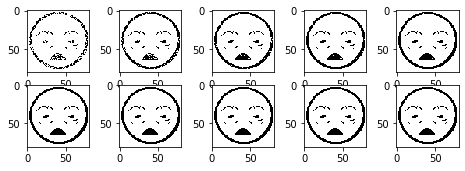

In [27]:
generate_test_images(test_img2,trained_weights)

# Test Image 4

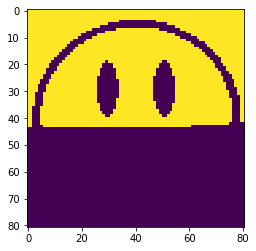

In [28]:
plt.imshow(test_img3.reshape(81,81))

100%|███████████████████████████████████████████████████████| 10/10 [08:35<00:00, 51.54s/it]


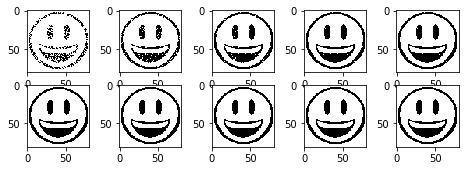

In [29]:
generate_test_images(test_img3,trained_weights)

# Test Image 5

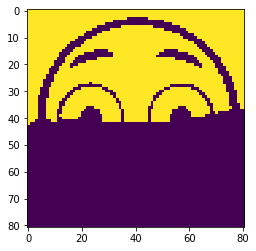

In [30]:
plt.imshow(test_img4.reshape(81,81))

100%|███████████████████████████████████████████████████████| 10/10 [09:31<00:00, 57.19s/it]


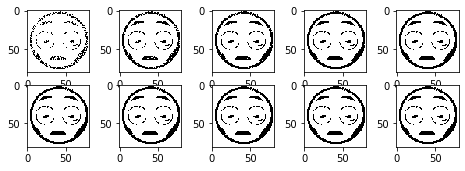

In [31]:
generate_test_images(test_img4,trained_weights)

In [32]:
cartoon_image_lst=['bugs_bunny_1.jpg','bugs_bunny_2.jpg','bugs_bunny_3.jpg']

In [33]:
original_toons=[]
for img in cartoon_image_lst:
    im=Image.open(img)
    im=convert_to_numpy_original(im)
    original_toons.append(im)

In [34]:
original_toons=np.array(original_toons)

In [35]:
original_toons=original_toons.reshape(3,81,81,3)

# Original Cartoons

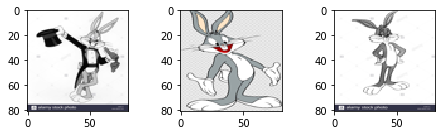

In [36]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(original_toons):
    plt.subplot(4, 3,num+1)
    plt.imshow(i.reshape(81,81,3))

# Transformed Cartoon Images

In [37]:
cartoon_epsilon=[]
for img in cartoon_image_lst:
    im=Image.open(img)
    im=convert_to_numpy_grayscale(im)
    cartoon_epsilon.append(im)
cartoon_epsilon=np.array(cartoon_epsilon).reshape(3,81,81)

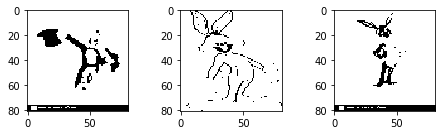

In [38]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(cartoon_epsilon):
    plt.subplot(4, 3,num+1)
    plt.imshow(np.where(i.reshape(sz_sqrt, sz_sqrt)<1, 0, 1), cmap='gray')

In [39]:
cartoon_epsilon2=cartoon_epsilon.reshape(3,sz)

In [40]:
cartoon_trained_weights=hebbian_train_hopfield(cartoon_epsilon2,3)

100%|███████████████████████████████████████████████████| 6561/6561 [11:42<00:00,  9.34it/s]


In [41]:
cartoon_trained_weights

array([[ 0.        ,  0.00045725,  0.00045725, ..., -0.00015242,
        -0.00015242, -0.00015242],
       [ 0.00045725,  0.        ,  0.00045725, ..., -0.00015242,
        -0.00015242, -0.00015242],
       [ 0.00045725,  0.00045725,  0.        , ..., -0.00015242,
        -0.00015242, -0.00015242],
       ...,
       [-0.00015242, -0.00015242, -0.00015242, ...,  0.        ,
         0.00045725,  0.00045725],
       [-0.00015242, -0.00015242, -0.00015242, ...,  0.00045725,
         0.        ,  0.00045725],
       [-0.00015242, -0.00015242, -0.00015242, ...,  0.00045725,
         0.00045725,  0.        ]])

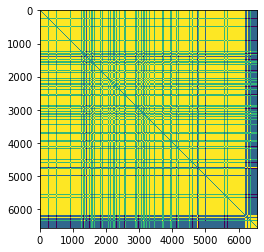

In [42]:
plt.imshow(cartoon_trained_weights)

In [43]:
test_cartoon_image_lst=['bugs_bunny_1_masked.jpg','bugs_bunny_2_masked.jpg','bugs_bunny_3_masked.jpg']

In [44]:
cartoon_tstimglst=[]
for i in test_cartoon_image_lst:
    image=Image.open(i)
    image=convert_to_numpy_grayscale(image)
    cartoon_tstimglst.append(image)

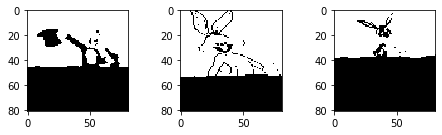

In [45]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(cartoon_tstimglst):
    plt.subplot(4, 3,num+1)
    plt.imshow(i.reshape(81,81), cmap='gray')

In [46]:
cartoon_test_img0=cartoon_tstimglst[0].reshape(sz)
cartoon_test_img1=cartoon_tstimglst[1].reshape(sz)
cartoon_test_img2=cartoon_tstimglst[2].reshape(sz)

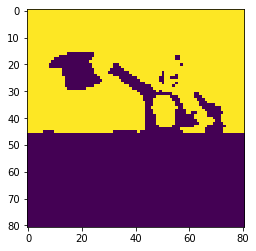

In [47]:
plt.imshow(cartoon_test_img0.reshape(81,81))

100%|███████████████████████████████████████████████████████| 10/10 [09:24<00:00, 56.40s/it]


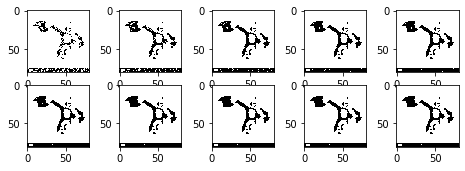

In [48]:
generate_test_images(cartoon_test_img0,cartoon_trained_weights)

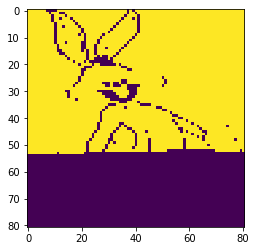

In [49]:
plt.imshow(cartoon_test_img1.reshape(81,81))

100%|███████████████████████████████████████████████████████| 10/10 [09:16<00:00, 55.62s/it]


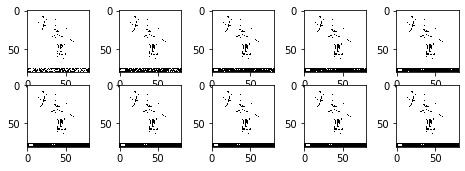

In [50]:
generate_test_images(cartoon_test_img1,cartoon_trained_weights)

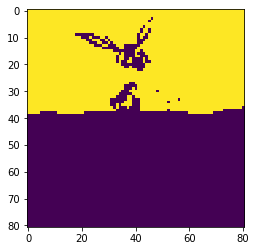

In [51]:
plt.imshow(cartoon_test_img2.reshape(81,81))

100%|███████████████████████████████████████████████████████| 10/10 [08:55<00:00, 53.59s/it]


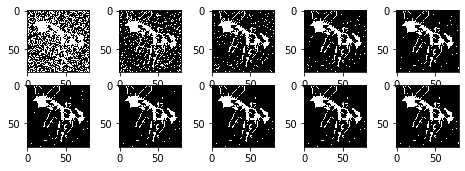

In [52]:
generate_test_images(cartoon_test_img2,cartoon_trained_weights)

In [53]:
human_image_lst=['adn.jpg','rsh.jpg']

In [54]:
original_human=[]
for img in human_image_lst:
    im=Image.open(img)
    im=convert_to_numpy_original(im)
    original_human.append(im)
original_human=np.array(original_human)

In [55]:
original_human=original_human.reshape(2,81,81,3)

# Original Human Faces

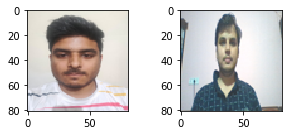

In [56]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(original_human):
    plt.subplot(4, 3,num+1)
    plt.imshow(i)

# Transformed Human Faces

In [57]:
human_epsilon=[]
for img in human_image_lst:
    im=Image.open(img)
    im=convert_to_numpy_grayscale(im)
    human_epsilon.append(im)
human_epsilon=np.array(human_epsilon).reshape(2,81,81)

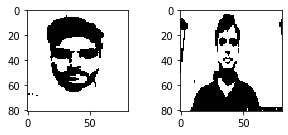

In [58]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(human_epsilon):
    plt.subplot(4, 3,num+1)
    plt.imshow(np.where(i.reshape(sz_sqrt, sz_sqrt)<1, 0, 1), cmap='gray')

In [59]:
human_epsilon2=human_epsilon.reshape(2,sz)

In [60]:
human_trained_weights=hebbian_train_hopfield(human_epsilon2,2)

100%|███████████████████████████████████████████████████| 6561/6561 [08:26<00:00, 12.96it/s]


In [61]:
human_trained_weights

array([[0.        , 0.00030483, 0.00030483, ..., 0.        , 0.        ,
        0.        ],
       [0.00030483, 0.        , 0.00030483, ..., 0.        , 0.        ,
        0.        ],
       [0.00030483, 0.00030483, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00030483,
        0.00030483],
       [0.        , 0.        , 0.        , ..., 0.00030483, 0.        ,
        0.00030483],
       [0.        , 0.        , 0.        , ..., 0.00030483, 0.00030483,
        0.        ]])

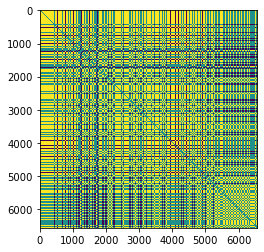

In [62]:
plt.imshow(human_trained_weights)

In [63]:
test_human_image_lst=['adn_masked.jpg','rsh_masked.jpg']

In [64]:
human_tstimglst=[]
for i in test_human_image_lst:
    image=Image.open(i)
    image=convert_to_numpy_grayscale(image)
    human_tstimglst.append(image)

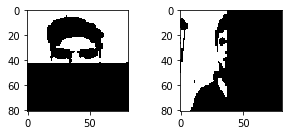

In [65]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(human_tstimglst):
    plt.subplot(4, 3,num+1)
    plt.imshow(i.reshape(81,81), cmap='gray')

In [66]:
human_test_img0=human_tstimglst[0].reshape(sz)
human_test_img1=human_tstimglst[1].reshape(sz)

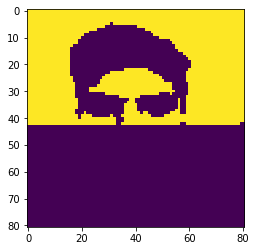

In [67]:
plt.imshow(human_test_img0.reshape(81,81))

100%|███████████████████████████████████████████████████████| 10/10 [09:14<00:00, 55.50s/it]


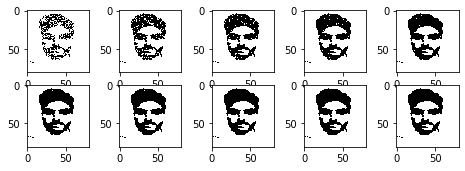

In [68]:
generate_test_images(human_test_img0,human_trained_weights)

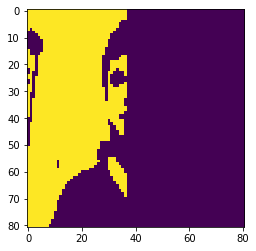

In [69]:
plt.imshow(human_test_img1.reshape(81,81))

100%|███████████████████████████████████████████████████████| 10/10 [08:57<00:00, 53.73s/it]


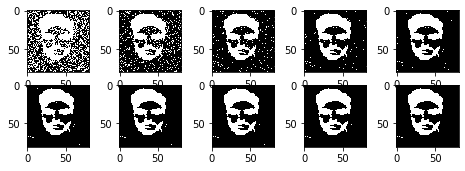

In [70]:
generate_test_images(human_test_img1,human_trained_weights)

In [71]:
digit_image_lst=['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg']

In [72]:
original_digits=[]
for img in digit_image_lst:
    im=Image.open(img)
    im=convert_to_numpy_original(im)
    original_digits.append(im)
original_digits=np.array(original_digits)

In [73]:
original_digits=original_digits.reshape(9,81,81,3)

# Original Digit Images 

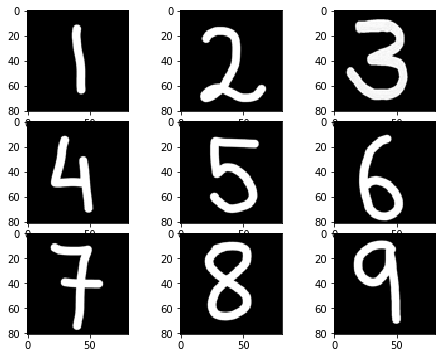

In [74]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(original_digits):
    plt.subplot(4, 3,num+1)
    plt.imshow(i)

# Transformed Input Digit Image

In [75]:
digit_image_lst=['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg']
digit_epsilon=[]
for img in digit_image_lst:
    im=Image.open(img)
    im=convert_to_numpy_grayscale(im)
    digit_epsilon.append(im)
digit_epsilon=np.array(digit_epsilon).reshape(9,81,81)

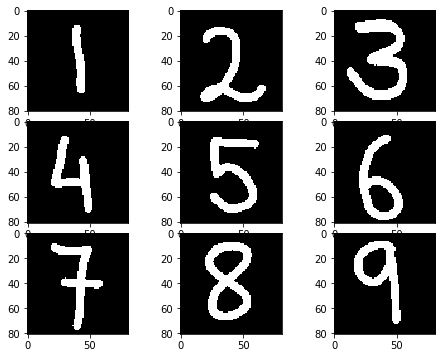

In [76]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(digit_epsilon):
    plt.subplot(4, 3,num+1)
    plt.imshow(np.where(i.reshape(sz_sqrt, sz_sqrt)<1, 0, 1), cmap='gray')

In [77]:
digit_epsilon2=digit_epsilon.reshape(9,sz)

In [78]:
digit_trained_weights=hebbian_train_hopfield(digit_epsilon2,9)

100%|███████████████████████████████████████████████████| 6561/6561 [34:43<00:00,  3.15it/s]


In [79]:
digit_trained_weights

array([[0.        , 0.00137174, 0.00137174, ..., 0.00137174, 0.00137174,
        0.00137174],
       [0.00137174, 0.        , 0.00137174, ..., 0.00137174, 0.00137174,
        0.00137174],
       [0.00137174, 0.00137174, 0.        , ..., 0.00137174, 0.00137174,
        0.00137174],
       ...,
       [0.00137174, 0.00137174, 0.00137174, ..., 0.        , 0.00137174,
        0.00137174],
       [0.00137174, 0.00137174, 0.00137174, ..., 0.00137174, 0.        ,
        0.00137174],
       [0.00137174, 0.00137174, 0.00137174, ..., 0.00137174, 0.00137174,
        0.        ]])

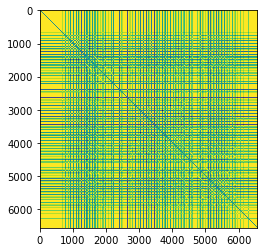

In [80]:
plt.imshow(digit_trained_weights)

# Test Images

In [81]:
test_digit_image_lst=['1_masked.jpg','2_masked.jpg','3_masked.jpg','4_masked.jpg','5_masked.jpg','6_masked.jpg','7_masked.jpg','8_masked.jpg','9_masked.jpg']

In [82]:
digit_tstimglst=[]
for i in test_digit_image_lst:
    image=Image.open(i)
    image=convert_to_numpy_grayscale(image)
    digit_tstimglst.append(image)

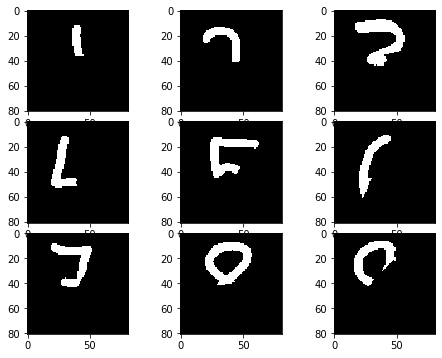

In [83]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(digit_tstimglst):
    plt.subplot(4, 3,num+1)
    plt.imshow(i.reshape(81,81), cmap='gray')

In [84]:
digit_test_img0=digit_tstimglst[0].reshape(sz)
digit_test_img1=digit_tstimglst[1].reshape(sz)
digit_test_img2=digit_tstimglst[2].reshape(sz)
digit_test_img3=digit_tstimglst[3].reshape(sz)
digit_test_img4=digit_tstimglst[4].reshape(sz)
digit_test_img5=digit_tstimglst[5].reshape(sz)
digit_test_img6=digit_tstimglst[6].reshape(sz)
digit_test_img7=digit_tstimglst[7].reshape(sz)
digit_test_img8=digit_tstimglst[8].reshape(sz)

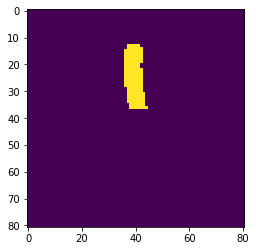

In [85]:
plt.imshow(digit_test_img0.reshape(81,81))

100%|███████████████████████████████████████████████████████| 20/20 [18:11<00:00, 54.57s/it]


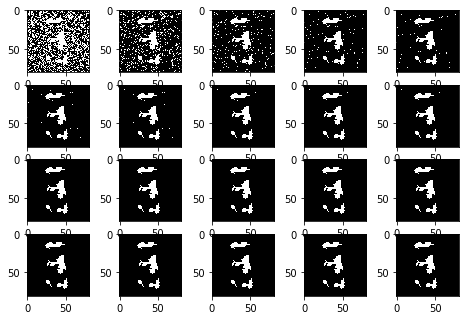

In [86]:
generate_test_images(digit_test_img0,digit_trained_weights,20)

# Test Digit 2

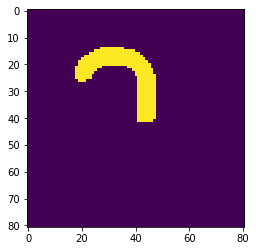

In [87]:
plt.imshow(digit_test_img1.reshape(81,81))

100%|███████████████████████████████████████████████████████| 20/20 [16:59<00:00, 50.97s/it]


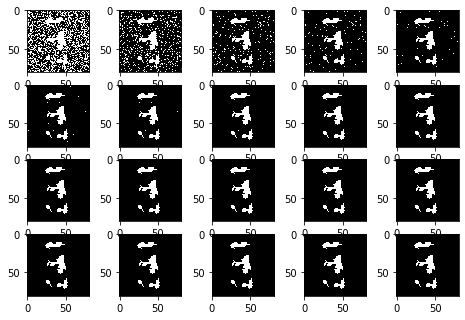

In [88]:
generate_test_images(digit_test_img1,digit_trained_weights,20)

# Test Digit 3

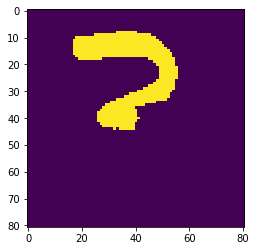

In [89]:
plt.imshow(digit_test_img2.reshape(81,81))

100%|███████████████████████████████████████████████████████| 20/20 [17:50<00:00, 53.54s/it]


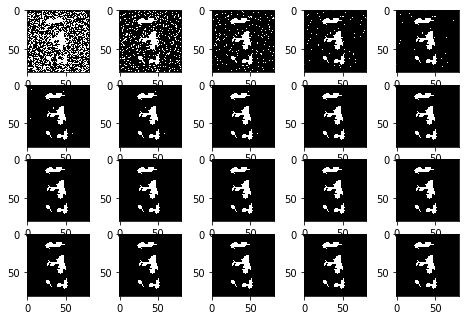

In [90]:
generate_test_images(digit_test_img2,digit_trained_weights,20)

# Test Digit 4

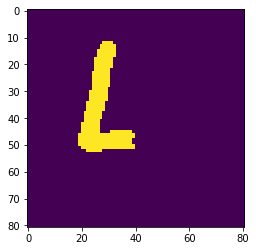

In [91]:
plt.imshow(digit_test_img3.reshape(81,81))

100%|███████████████████████████████████████████████████████| 20/20 [18:00<00:00, 54.00s/it]


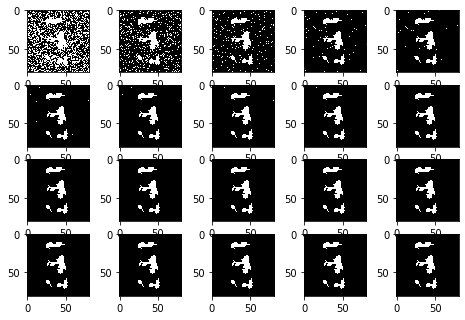

In [92]:
generate_test_images(digit_test_img3,digit_trained_weights,20)

# Using NeuroDynex Package

In [96]:
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


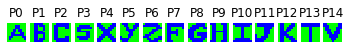

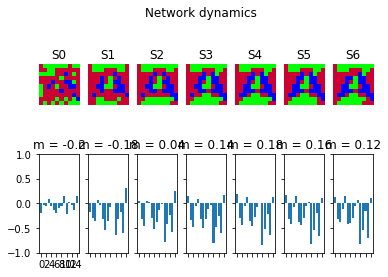

In [97]:
import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A','B', 'C','S', 'X', 'Y', 'Z']
letter_add=['F','G','H','I','J','K','T','V']
letter_list+=letter_add

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)


abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state =pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=1)#a deficient in code
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states=hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns=pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")
